# Predicting Heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

we're going to take the following approach:

1. Problem Definition.
2. Data.
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [1]:
# import Libraries for exploration analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataf=pd.read_csv("../heart-disease.csv")

In [3]:
dataf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataf.shape  #(rows,columns)

(303, 14)

In [5]:
dataf.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
dataf["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


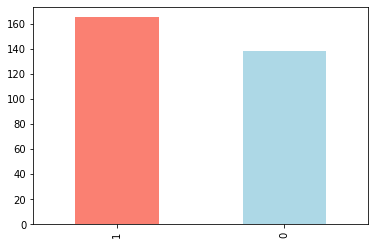

In [8]:
dataf["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [9]:
dataf.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
dataf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex


In [11]:
dataf.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

***1=Male,
0=Female***

In [12]:
# Compare target column with sex column
pd.crosstab(dataf.target,dataf.sex)

sex,0,1
target,,
0,24,114
1,72,93


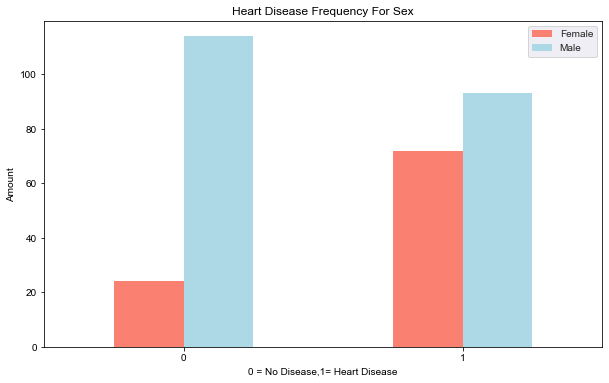

In [13]:
# Create a plot of cross tab 
pd.crosstab(dataf.target,dataf.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
sns.set_style("darkgrid")
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Disease,1= Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [14]:
dataf["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

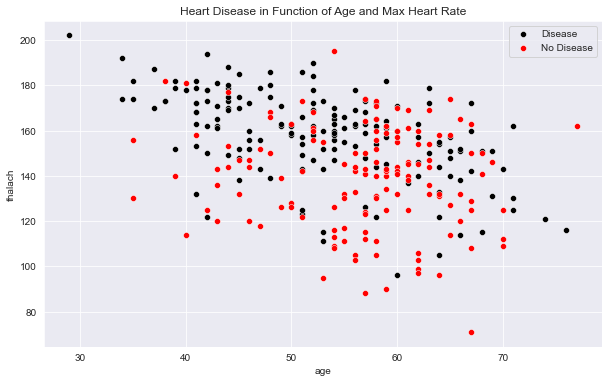

In [15]:
# create a Figure

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
# Scatter with positive example
sns.scatterplot(x=dataf.age[dataf.target==1],y=dataf.thalach[dataf.target==1],color="black");
# Scatter with negative example
sns.scatterplot(x=dataf.age[dataf.target==0],y=dataf.thalach[dataf.target==0],color="red");
plt.title("Heart Disease in Function of Age and Max Heart Rate");
plt.legend(["Disease","No Disease"]);

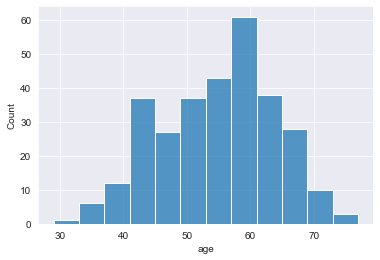

In [16]:
# Check the distribution of the age column with a histogram
sns.histplot(dataf["age"]);

## Heart Disease Frequency For Chest pain Type

In [17]:
pd.crosstab(dataf.cp,dataf.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


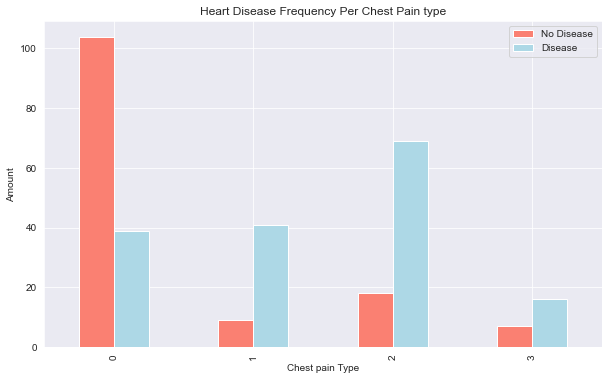

In [18]:
# Make the crosstab more visual
pd.crosstab(dataf.cp,dataf.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

#Add some communication
plt.title("Heart Disease Frequency Per Chest Pain type");
plt.xlabel("Chest pain Type");
plt.ylabel("Amount");
plt.legend(["No Disease","Disease"]);

In [19]:
# Make a correlation matrix
dataf.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [20]:
# let's make our correlation matrix a little prettier.
corr_matrix=dataf.corr()

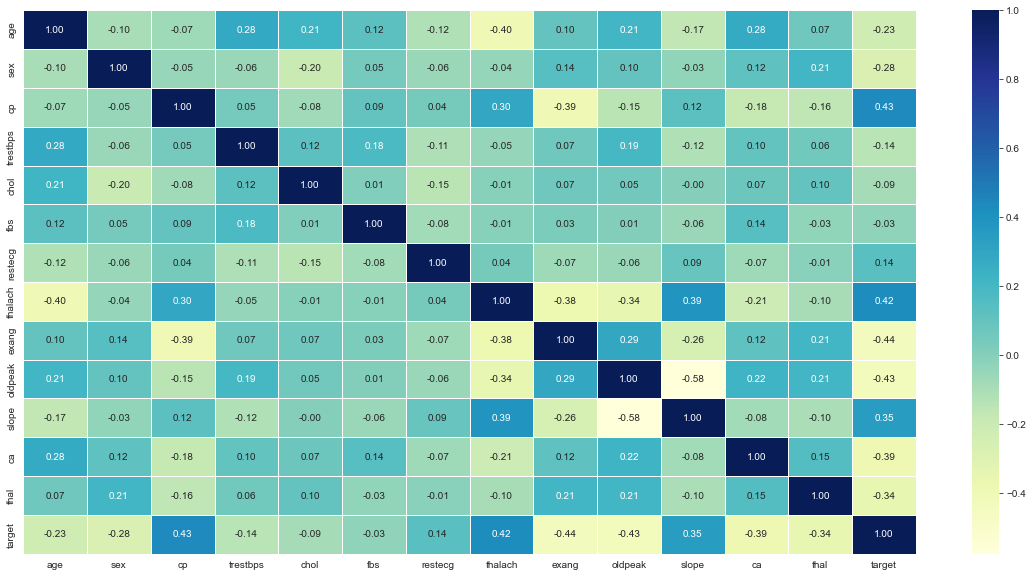

In [21]:
plt.figure(figsize=(20,10));
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu",linewidths=0.5,fmt=".2f");

## 5.Modelling

In [22]:
dataf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into X and Y
X=dataf.drop("target",axis=1)
Y=dataf["target"]

In [24]:
# Split data into train and test set
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
print(f"Shape of training data {x_train.shape}.")
print(f"Shape of testing data {x_test.shape}.")

Shape of training data (242, 13).
Shape of testing data (61, 13).


Now we've got our data split traning and test set it's time to build a  machine learning model.

we'll train it(Find the patterns) on the training set.

and we'll test it (use the patterns) on the test set.

we're going to try three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Put models in a Dictionary.
models={"Logistic Regression":LogisticRegression(max_iter=1000),
       "KNN":KNeighborsClassifier(),
       "RandomForestClassifier":RandomForestClassifier()}

# Create a function to fit and score model.
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """Fit and evaluates given machine learning models.
    models : a dictionary of different scikit-learn machine learning models
    x_train : training data(no labels)
    x_test : testing data(no labels)
    y_train : training labels.
    y_test : test labels
    """
    np.random.seed(42)
    # make dictionary to keep model score.
    model_scores={}
    
    #Loop through models.
    for name,model in models.items():
        # fit the model to the data.
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [28]:
model_scores=fit_and_score(models,
                           x_train,
                           x_test,
                           y_train,
                           y_test)
model_scores

C:\Users\Ankit Kumar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparisons

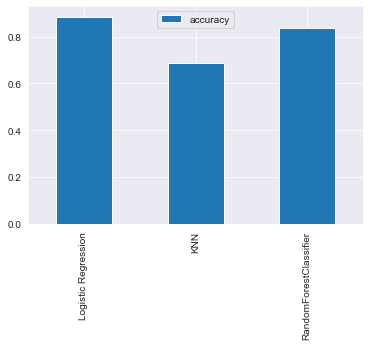

In [29]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first prediction aren't always what we should based our next steps off.what should we do?

let's look at the following:
* Hyperparameter tuning
* feature importance
* Confusion Matrix
* Cross-validation 
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve(AUC)

## Hyperparameter Tuning (By Hand)

In [30]:
# Let's tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n-neighbours
neighbors=range(1,21)

#Set up KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


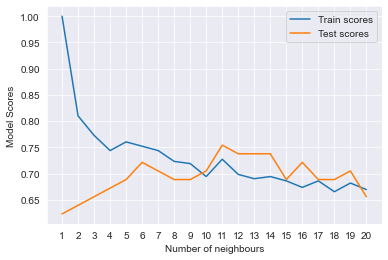

In [33]:
plt.plot(neighbors,train_scores,label="Train scores");
plt.plot(neighbors,test_scores,label="Test scores");
plt.xticks(np.arange(1,21,1));
plt.xlabel("Number of neighbours");
plt.ylabel("Model Scores");
plt.legend();

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

***KNN doesn't meet the level of logistic regression and RandomForestClassifier even with the hyperparameter tuning.so we're not gonna perform testing and evaluation on it now.let's try the other two with hyperparameters tuning and find out which model is best suited for our data.***

## Hyperparameters tuning using `RandomizedSearchCV`

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]
             }
# Create a hyperparameter grid for RandomForestClassifier
rand_forest_grid={"n_estimators":np.arange(10,1000,50),
                 "max_depth":[None,3,5,10],
                 "min_samples_split":np.arange(2,20,2),
                 "min_samples_leaf":np.arange(1,20,2)
                 }

In [35]:
# Tune logistic Regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(estimator=LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# Fit random Hyperparameter search for Logistic Regression.
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned our logistic regression let's do same for RandomForestClassifier()

In [38]:
np.random.seed(42)
rs_rf_c=RandomizedSearchCV(estimator=RandomForestClassifier(),
                          param_distributions=rand_forest_grid,
                          n_iter=20,
                          verbose=True,
                          cv=5)
# Fit random hyperparameter search for RandomForestClassifier
rs_rf_c.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf_c.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
rs_rf_c.score(x_test,y_test)

0.8688524590163934

## Hyperparameter tuning with `GridSearchCV`
since so far our logistic regression provides the best score we'll try and improve it further with gridsearch

In [41]:
log_gs_grid={"C":np.logspace(-4,4,30),
            "solver":['liblinear']}

gs_log_reg=GridSearchCV(estimator=LogisticRegression(),
                       param_grid=log_gs_grid,
                       cv=5,
                       verbose=True)
# Fit HyperParameter GridSearch Model
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our Tuned Machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

and also use cross-validation

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [45]:
# Let's Make predictions to use further
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

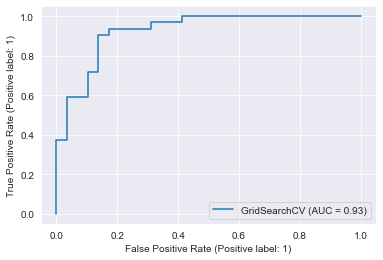

In [46]:
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test);

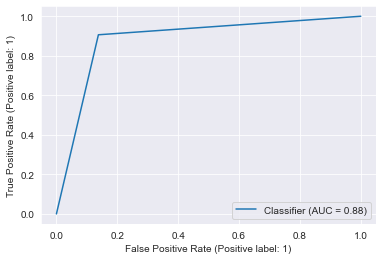

In [47]:
RocCurveDisplay.from_predictions(y_test,y_preds);

In [48]:
cm=confusion_matrix(y_test,y_preds)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

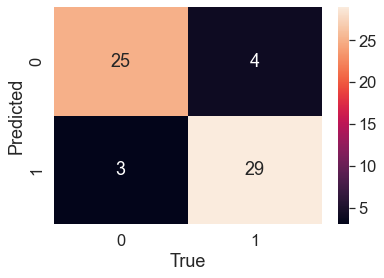

In [49]:
sns.set(font_scale=1.5);
sns.heatmap(cm,annot=True);
plt.xlabel("True");
plt.ylabel("Predicted");

In [50]:
# the precision score of our model
precision_score(y_test,y_preds)

0.8787878787878788

In [51]:
# recall score of the model
recall_score(y_test,y_preds)

0.90625

In [52]:
# F1 score of the model.
f1_score(y_test,y_preds)

0.8923076923076922

In [53]:
# Let's get the classification report of the model
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evaluation metrix using cross-validation

In [54]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# Create a classifier with Best parameter.
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [56]:
# cross-validation for our classifier
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")

In [57]:
cv_acc=np.mean(cv_acc)

In [58]:
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)

In [59]:
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)

In [60]:
cv_f1score=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1score)

In [61]:
cv_metrics=pd.DataFrame({"cv_acc":cv_acc,
                         "cv_pre":cv_pre,
                         "cv_recall":cv_recall,
                         "cv_f1":cv_f1},index=[0])
cv_metrics

,cv_acc,cv_pre,cv_recall,cv_f1
0,0.844699,0.820794,0.921212,0.867301


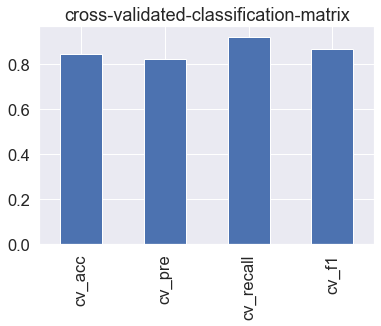

In [62]:
cv_metrics.T.plot(title="cross-validated-classification-matrix",legend=False,kind="bar");

In [63]:
from joblib import dump,load

In [64]:
dump(gs_log_reg,filename="heart-disease-classification-model")

['heart-disease-classification-model']

In [65]:
load_model=load(filename="heart-disease-classification-model")

In [66]:
load_model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)